### 딥러닝 기반 기계 번역 발전 과정

* 최근(2021)의 고성능 모델들은 Transformer 아키텍쳐를 기반으로 함
  * GPT : Transformer의 Decoder 활용
  * BERT : Transformer의 Encoder 활용
  
  
* seq2seq : LSTM을 활용하여 고정된 크기의(압축된) context vector 활용 => Attention 이후 입력 시퀀스 전체에서 정보를 추출하는 방향으로 발전

**자연어 처리 태스크에서 Attention 매커니즘이 주류로 활용**

### seq2seq 모델의 한계

* 고정 길이의 context vector에 소스 문장의 정보를 압축 => 병목 현상이 발생하여 성능 하락의 원인 
   * 하나의 문맥 벡터가 소스 문장의 모든 정보를 가지고 있어야 함
   * 입력 문장의 길이에 관계 없이 정보를 고정 길이의 벡터로 밀어넣음
   
   
* 기울기 소실
   
   

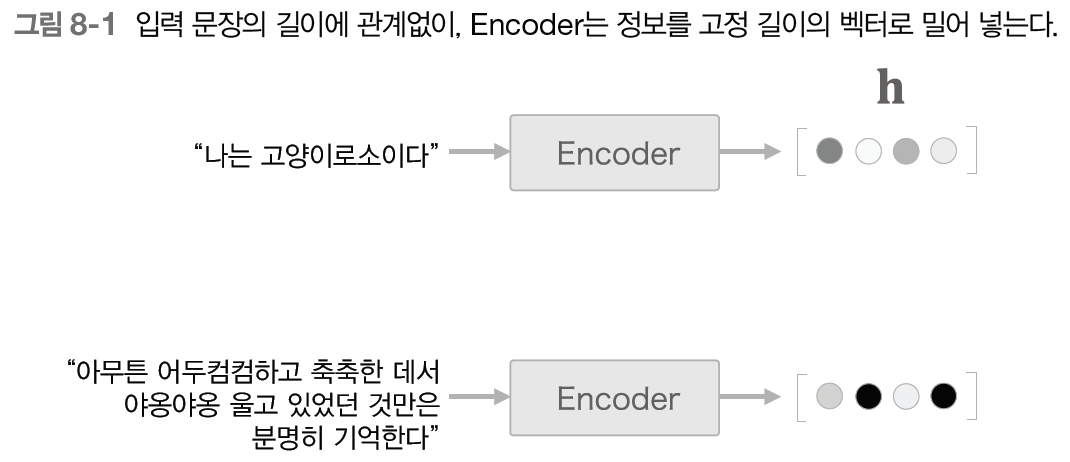

### 해결  - Encoder


* Decoder에서 매번 소스 문장에서의 출력 전부를 입력으로 받음


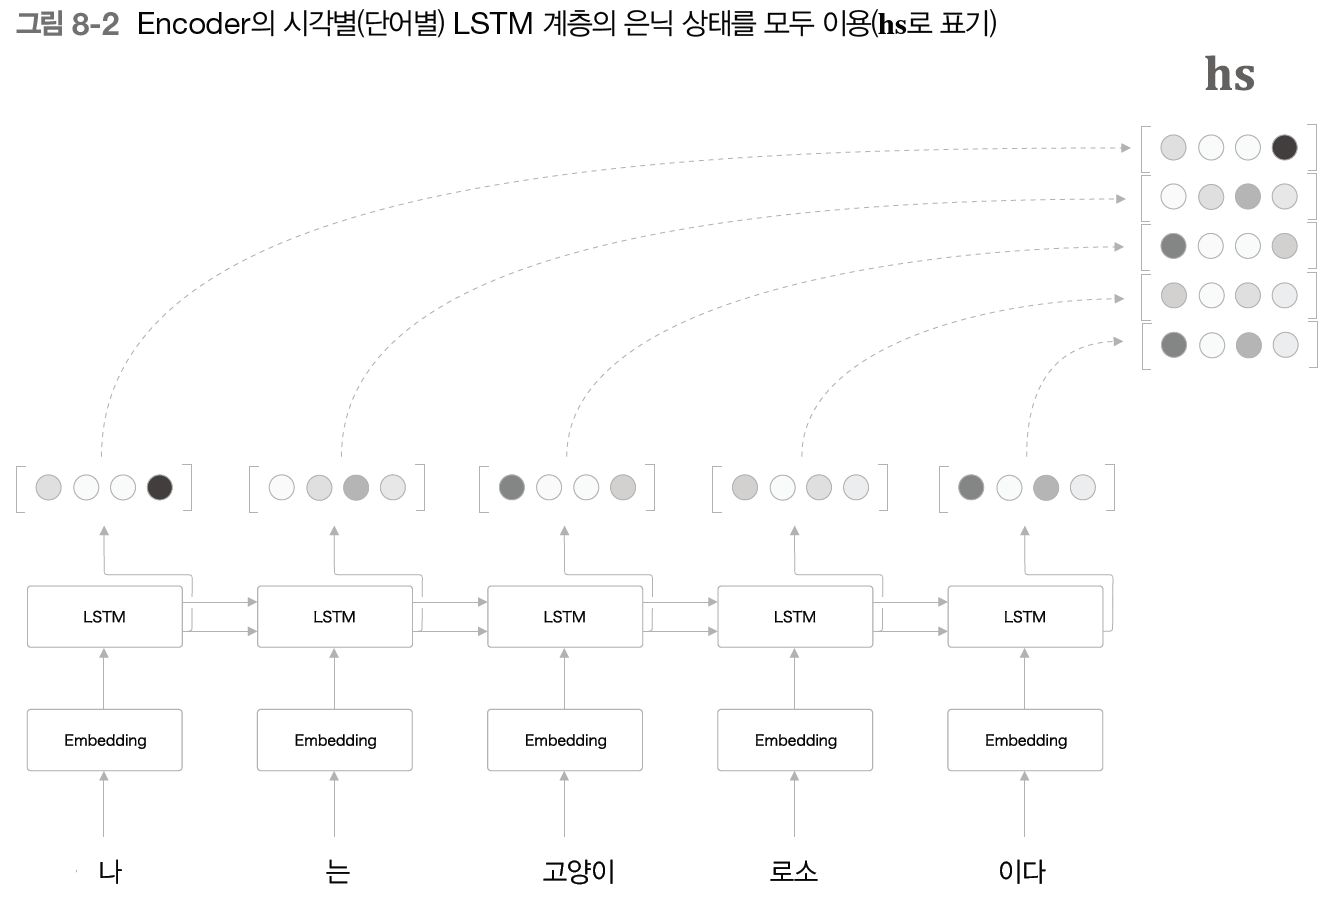


* hs는 단어 수 만큼의 벡터를 포함 & 각각의 벡터는 해당 단어에 대한 정보를 많이 포함 (직전에 입력된 단어에 대한 정보를 많이 포함)

### 해결 - Decoder


* hs 전부를 활용할 수 있도록
* 입력과 출력의 여러 단어 중 어떤 단어끼리 서로 관련되어 있는가 라는 대응관계를 seq2seq에게 학습 시킴
   * 기계 번역에서의 alignment  ex) 고양이=cat
   *  **어텐션 기술은 alignment 아이디어를 seq2seq에 자동으로 도입하는데 성공함**
   
   
* 필요한 정보에 주목하여, 그 정보로부터 시계열 변환 수행
   * 도착어와 대응 관계에 있는 출ㄹ발어 단어의 정보를 골라내어 번역 수행
   
   
   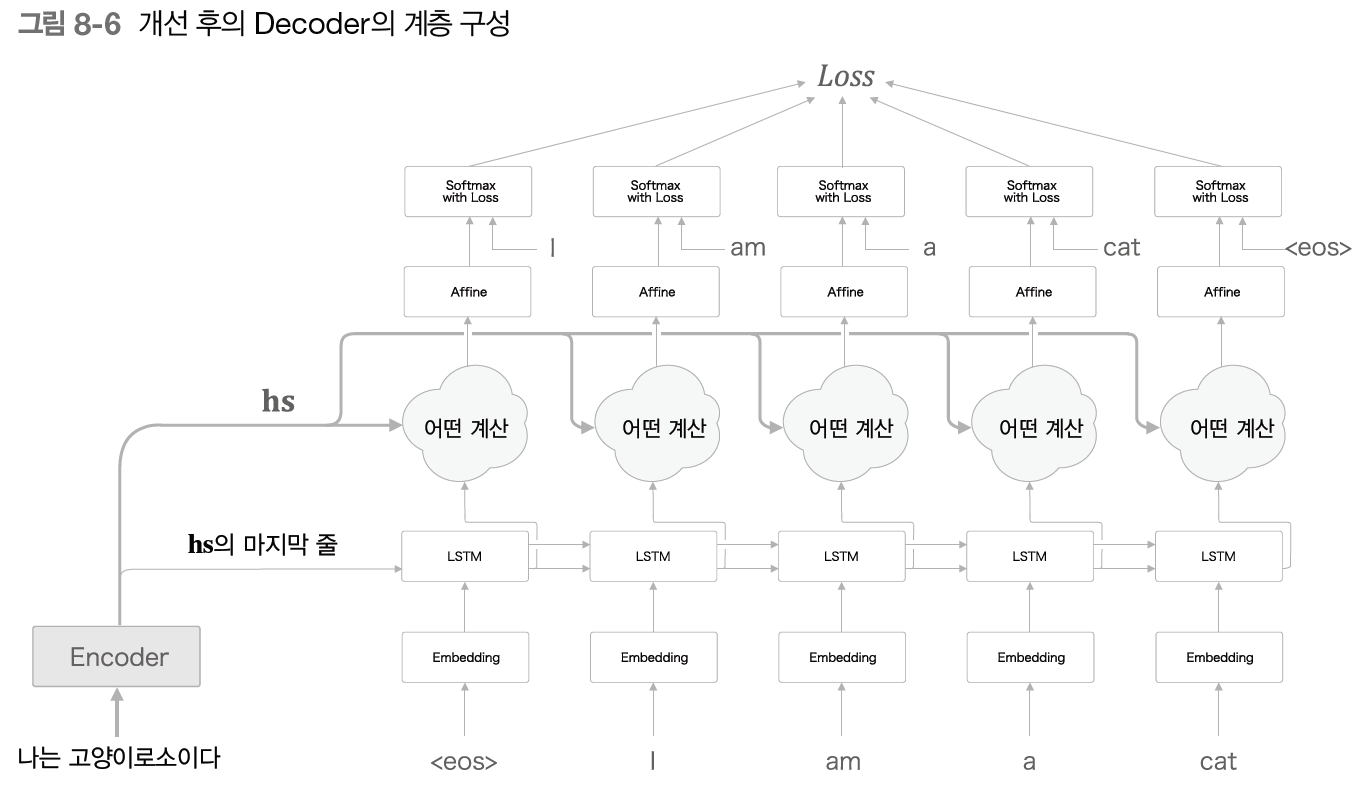    

* **Attention(어떤 계산)** : Decoder에 입력된 단어와 대응 관계인 단어의 벡터를 hs에서 **선택**하는 작업
    * 선택 연산은 미분 불가능하기 때문에 각 단어의 중요도(기여도)를 별도로 계산
    
* Decoder에 Attention 정보가 추가됨
    
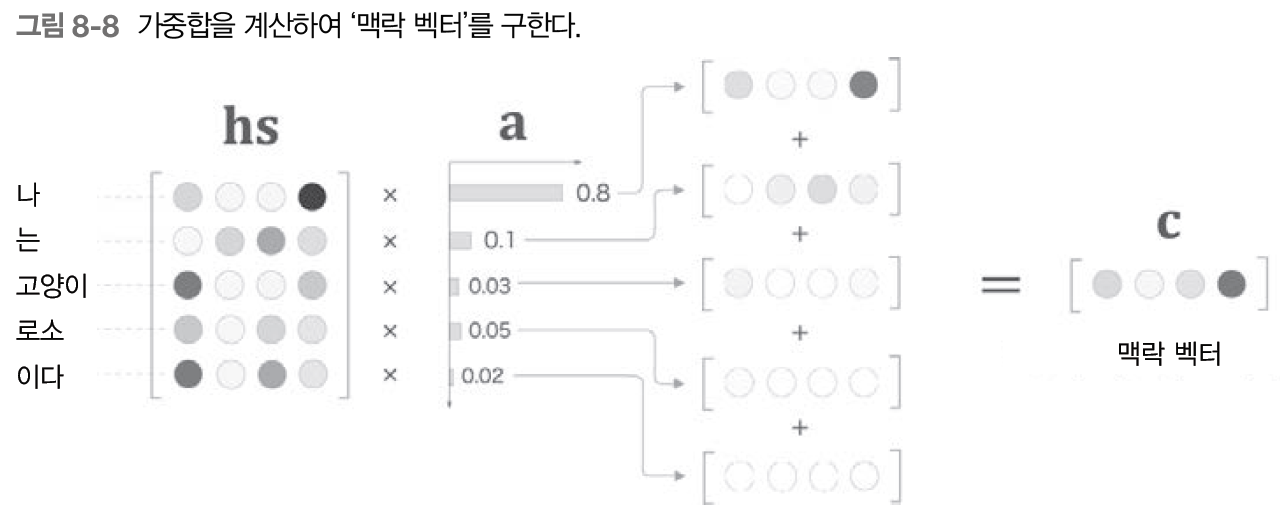


* 각 단어에 대해 그것이 얼마나 중요한지를 나타내는 가중치a를 계산 => hs와 a의 가중합
   * '나' 벡터를 선택하는 작업을 미분 가능한 가중합 연산으로 대체

#### 가중치 계산

* Decoder에 입력된 단어의 hidden state 벡터 h가 hs의 각 단어 벡터와 얼마나 유사한지 계산
   * 내적을 통해 유사도 계산
   
   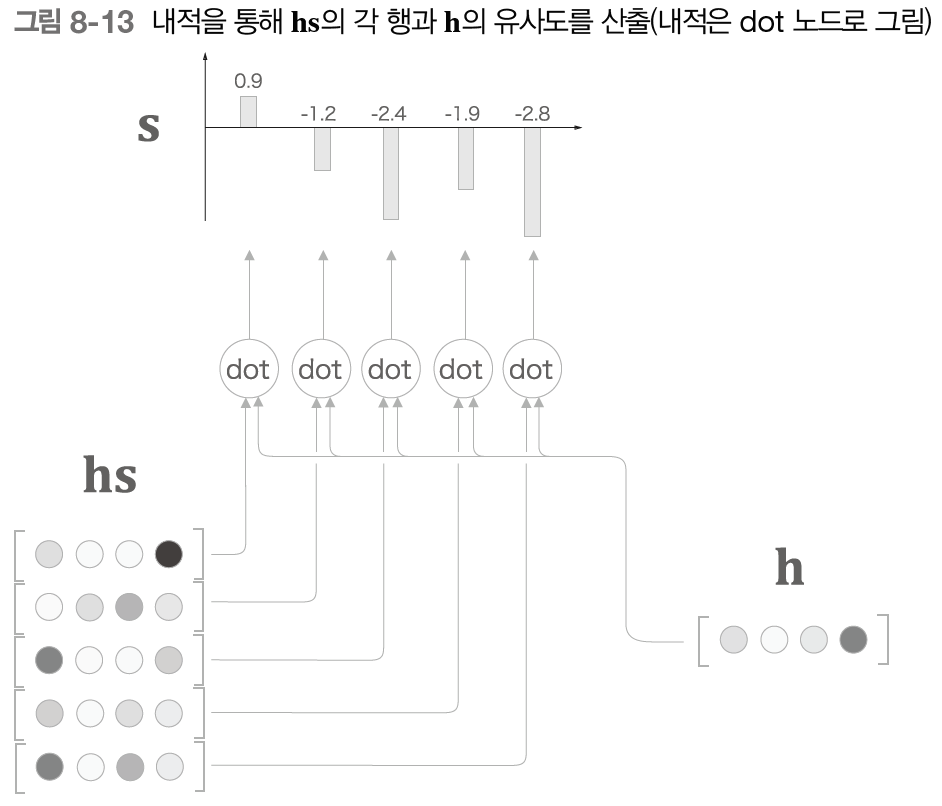

### Seq2Seq with Attention

* Attention 매커니즘 활용 => 디코더가 인코더의 모든 hidden state 출력을 참고
   * 디코더가 문장을 생성할 때마다 소스 문장 전체를 반영하게 됨
   
   
* 디코더의 hidden state 출력과 인코더의 모든 hidden state 출력을 담은 배열의 행렬곱
   * 소스 문장에서 어떤 단어에 **초점**을 둘 지를 수치화 (어떤 벡터에 더 많은 가중치를 두어 참고하면 좋을 지)
   
**모델이 필요에 따라 입력 시퀀스의 관련 부분에 집중할 수 있도록 해줌** \
**해당 시점에서 예측해야 하는 결과와 연관이 있는 부분을 판단하여 좀 더 집중(Attention)**


* context vector와 소스 문장의 모든 정보를 참고 (가중치가 높은 단어 벡터에 초점을 맞추어서)




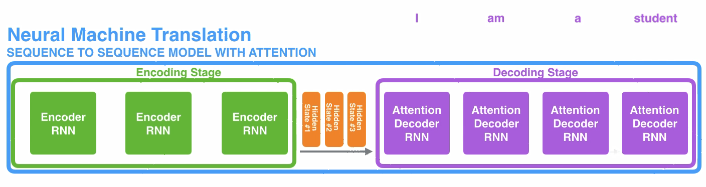

### Seq2Seq with Attention : Decoder

* 매번 인코더의 출력 중 어떤 정보가 중요한지 계산 (가중치 계산)
   * i : 현재 디코더가 처리중인 인덱스
   * j : 각각의 인코더 출력 인덱스
   

* energy = e_ij = a(s_i-1, h_j) : 어떤 인코더의 hidden state값과 연관성이 높은지를 표현
* weight = a_ij = exp(e_ij) / sigma(exp(e_ik)) where k=1...T_x : softmax

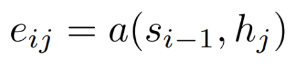
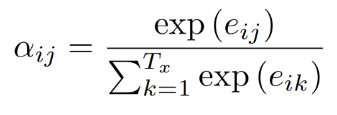

* 가중치가 반영된 인코더의 출력 결과를 반영

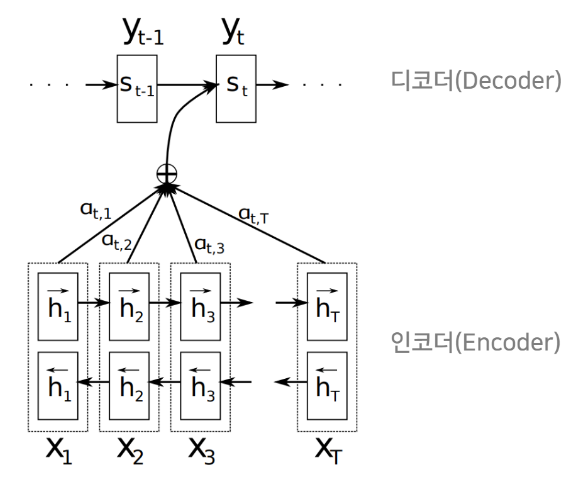

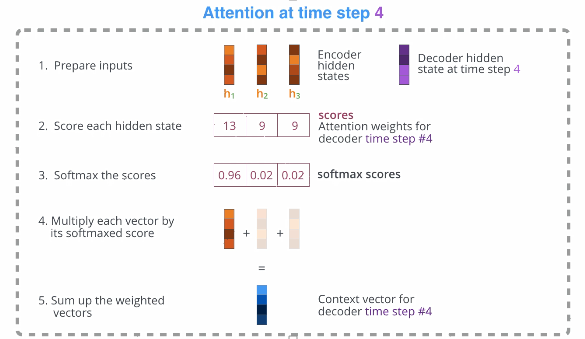

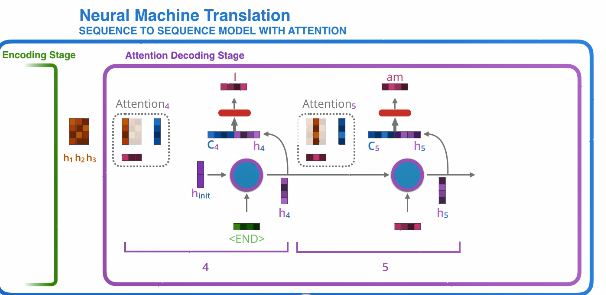

### Seq2Seq with Attention : 시각화

* 가중치를 사용해 각 출력이 어떤 입력 정보를 참고했는 지 알 수 있음
* 어떤 요소에 더 초점을 두고, 주의를 기울이는가
* 단어와 단어의 관련성이라는 인간이 이해할 수 있는 구조와 의미를 모델에 제공할 수 있음

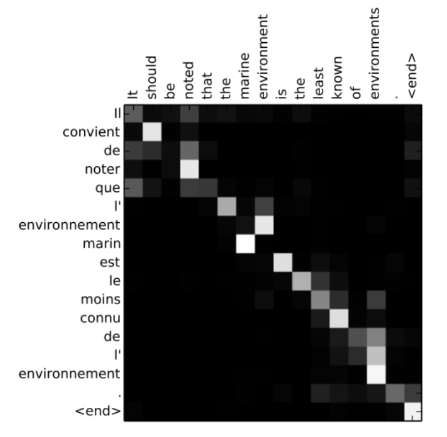

### Transformer

* RNN, CNN대신 positional encoding 사용 (순서에 대한 정보)
* attention 과정을 여러 레이어에서 반복

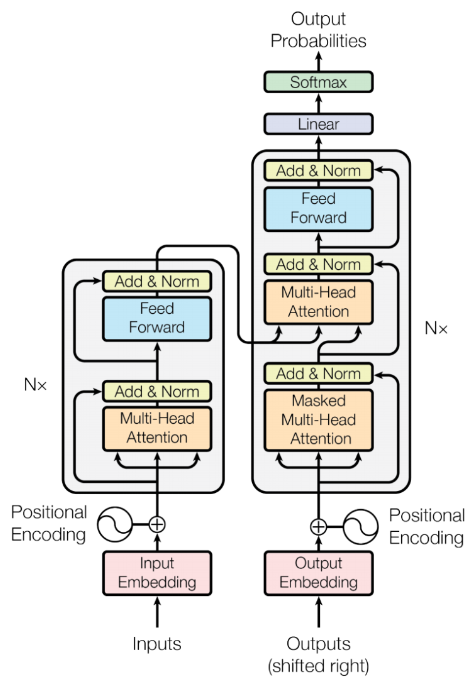


* 전통적인 임베딩 : (입력 차원) x (임베딩 차원)

### Transformer 동작 원리 1 : 입력 값 임베딩

* 위치 정보를 포함하는 임베딩 사용 => positional encoding

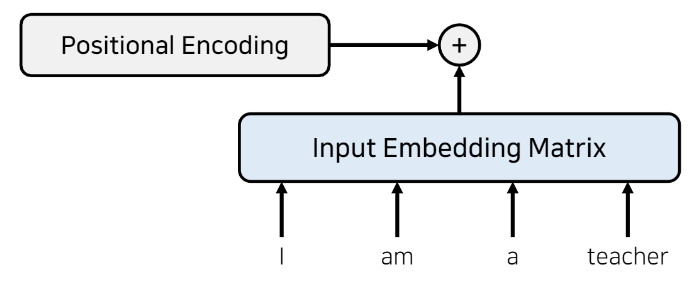

### Transformer 동작 원리 2 : 인코더

* attention 진행 : 문맥 정보 학습
* residual learning을 사용 
* **각 레이어는 서로 다른 파라미터를 가짐**

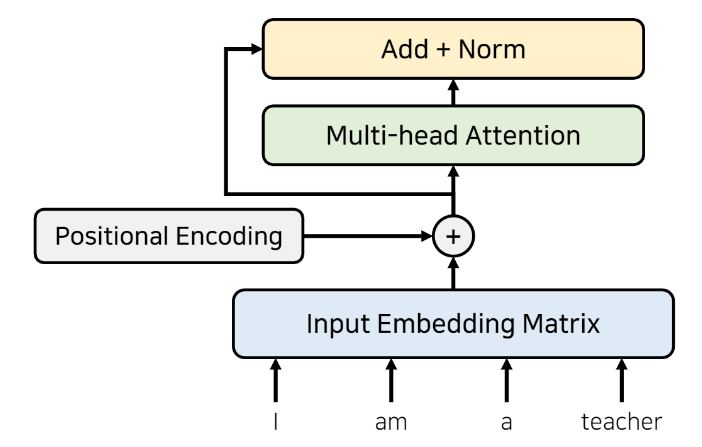


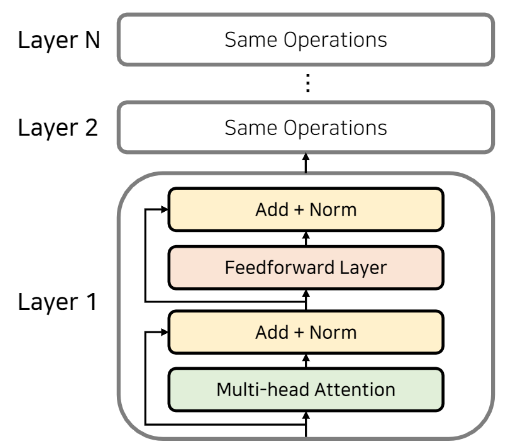

### Transformer 동작 원리 3 : 인코더, 디코더

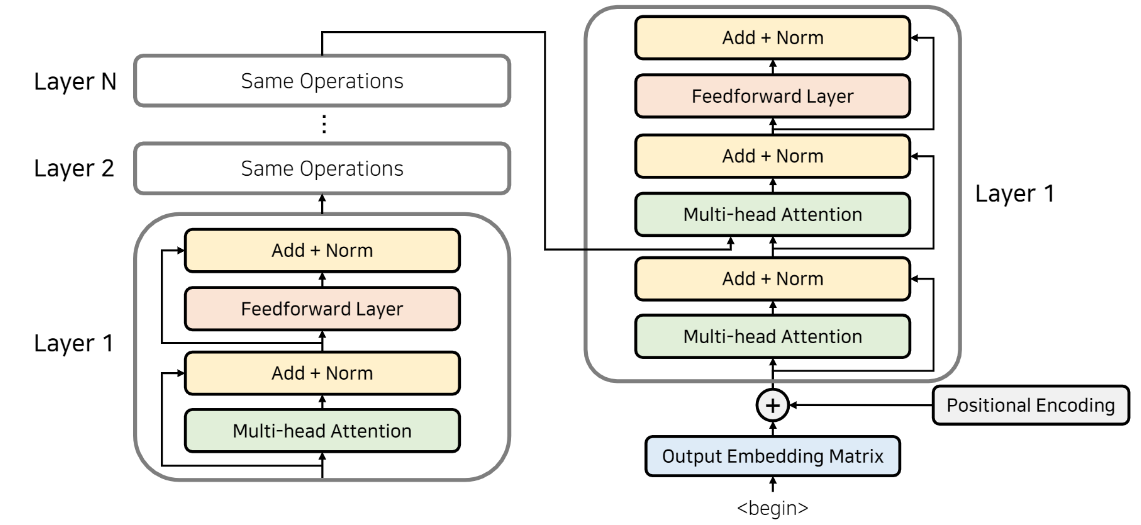

* 인코더의 최종 출력값이 모든 디코더 레이어에 입력으로 들어감 => 입력 소스 문장 중 어떤 단어에 더 초점을 맞춰야 하는 지 알려줌
  * 모든 레이어의 출력값을 입력으로 받는 case도 존재
  
  
* 디코더는 2개의 attention 사용
  * 첫번 째 : self attention
  * 두번 째 : 인코더에 대한 정보를 attention (소스 문장과의 연관성)

### Transformer 동작 원리 4 : Multi-Head Attention

* 특정 단어가 다른 단어와 어떠한 연관성을 가지는지 파악


* Query, Key, Value
  * Query : 물어보는 주체 / Key : Attention을 수행할 단어들
  * I am a teacher : I(Query)가 I am a teacher각각(Key)에 대해서 얼마나 연관성이 있는 지 구함
  

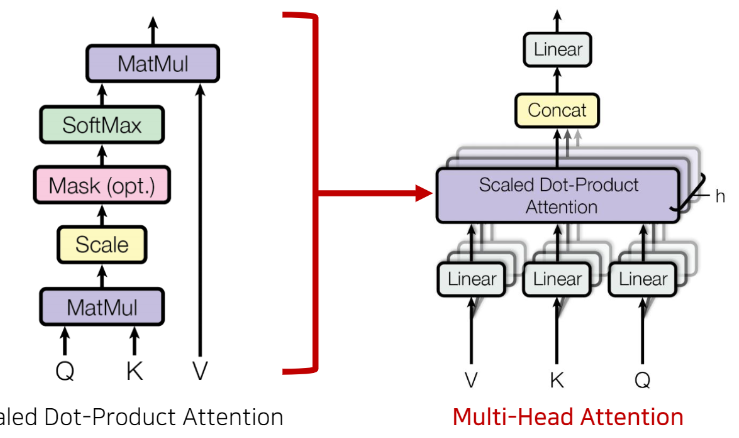

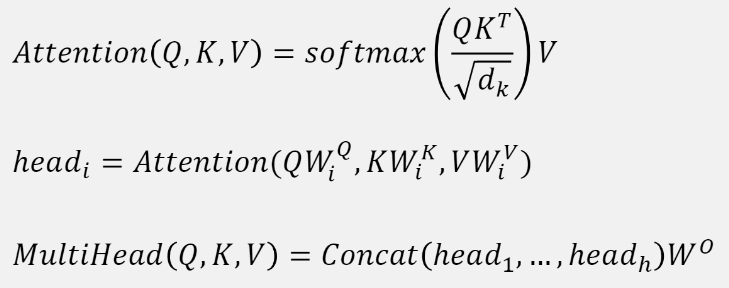

* 각 쿼리에 대해 키에 대한 에너지 값을 구하고, 확률값으로 표현 (어떤 키에 대해 높은 가중치를 갖는지)
  * d : scale factor (기울기 소실 문제 방지)
  

**Multi-headed with h**
* 서로 다른 레이어를 거침 (h개의 서로 다른 컨셉을 네트워크가 구분해서 학습) 
* attention layer에 여러 representation subspace제공 (h개의 서로 다른 liner projection)
* 다른 위치에 집중할 수 있는 모델의 능력을 확장

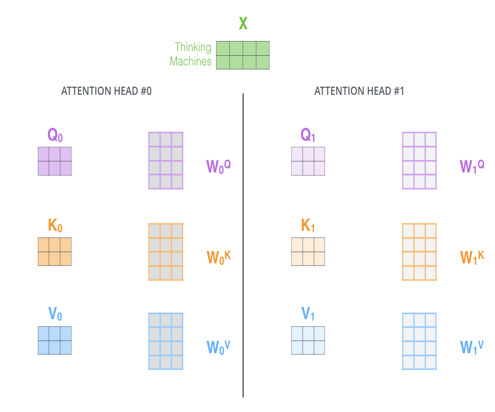

* head마다 서로 다른 Q, K, V 가중치를 가짐

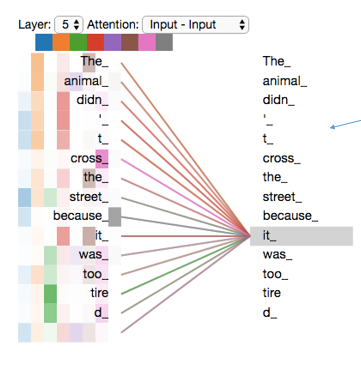

#### Attention Score 구하기

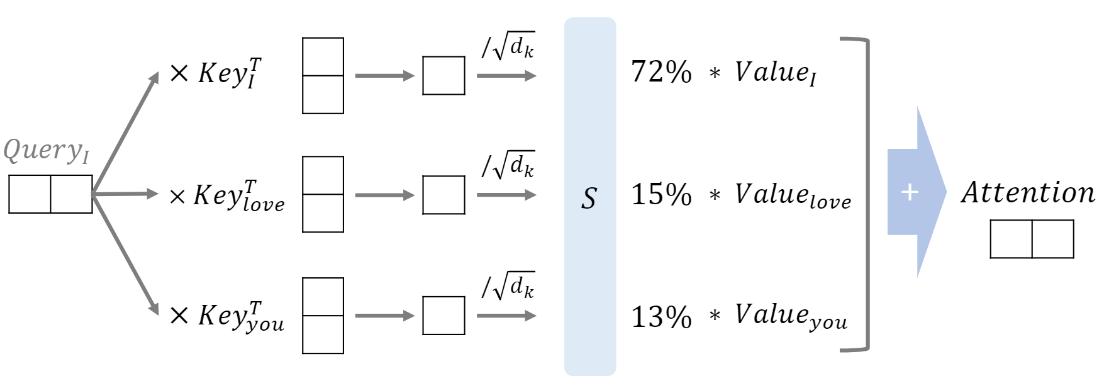

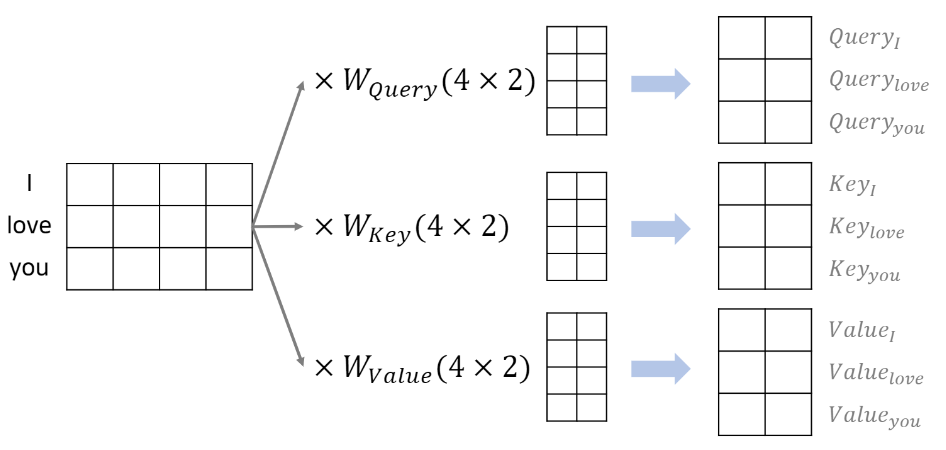

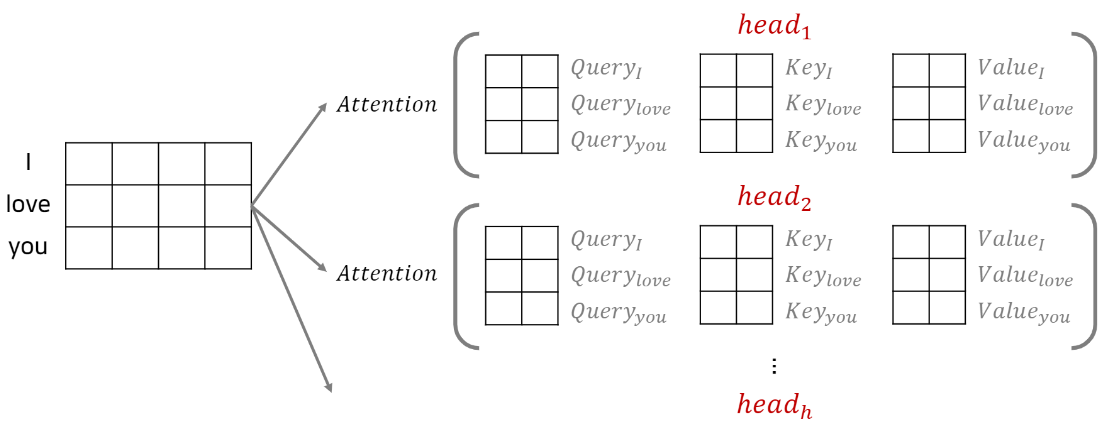


* Multihead(Q, K, V)를 수행해도 차원은 동일하게 유지됨
* Mask : 특정 단어는 무시하도록  ex) 디코더에서 이전 시점의 단어들만 참고하여 cheating이 없도록 함

### Attention 종류

* Encoder Self Attention : 문장의 전체적인 표현 학습


* Masked Decoder Self Attention : 문장의 전체적인 표현 학습, 단 Mask를 사용해 입력 이후 시점의 단어들은 참고하지 못하도록


* Encoder-Decoder Attention : 출력 단어들이 입력 단어들 중 어떠한 정보(단어)에 초점을 맞추는 지
   * Decoder의 Query가 Encoder의 key, value값 참고

Self Attention : 매번 입력 문장에서 각 단어가 다른 어떤 단어와 연관성이 높은지 계산

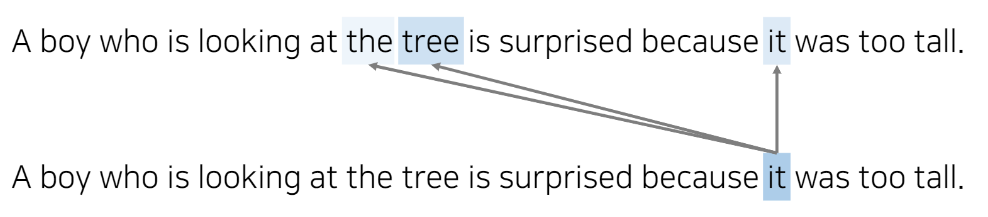

## 논문 읽기

### Abstract

* RNN, CNN을 사용하지 않고 전적으로 Attention 메커니즘에 기반
   * recurrence하게 각각의 sequnece를 처리 x, 행렬곱을 이용해 병렬적으로 sequence 데이터를 처리하여 효율적
   
   
* self-attention을 multi head로 활용하여 input representation을 반복적으로 정제

### Introduction

* Sequence modeling을 위한 RNN, LSTM, GRU등 다양한 모델들이 제안되어 왔음
   * recurrent하게 동작하여 dependency가 있음 (sequence의 길이, 토큰의 개수만큼 신경망에 입력을 넣어야 함) => 병렬적 처리가 어려움 , layer의 출력을 행렬곱으로 바로 계산하기 어려움, 메모리 및 속도 측면에서 비효율적
   

* Attention : 매번 출력 단어를 만들어낼때마다 소스 문장의 출력 정보 중 어떤 정보가 중요한지 가중치를 부여, 가중치가 적용되어 곱해진 hidden state값을 이용하여 출력 단어를 보다 효과적으로 생성


**Recurrence 속성을 완벽히 제거**
* 한번의 행렬곱으로 위치 정보가 포함된 전체 sequence를 한번에 처리할 수 있음 (순차적으로 입력을 넣을 필요가 없어 병렬처리가 가능)

### Background

* Self-attention(intra-attention) : 문장 스스로에 대해 attentin을 적용하여 sequence에 대한 representation learning수행
   * ex) 문장의 모든 단어가 서로가 서로에 대해 attention을 수행하여 가중치를 부여

### Model Architecture


* 트랜스포머도 인코더-디코더 구조를 가짐
   * 입력 sequence를 representations z로 mapping, 디코더가 z를 출력으로 mapping
   * auto regressive : 이전 출력층의 hidden state 출력 참고
   
   
* RNN을 사용하지 않는 대신 sequence내 단어들의 위치 정보를 반영하기 위해 **positional encoding을 사용, 입력 임베딩과 합침** (Q, k, V로 복제)
   * attention은 입,출력의 차원이 동일
   * 총 N개의 레이어 생성
   * 최종 출력값을 매 encoder-decoder attention이 사용할 수 있도록 함


* Decoder는 masking을 통해 뒤에 나오는 단어를 참조하지 못하게함
   * 두 번째 attention에서는 query값이 decoder에 있음(k, v는 encoder에서), encoder의 어떤 정보를 참고할지 attention 수행